# Phase 3 - SQL Operations

In [2]:
import sqlite3
import csv
import pandas as pd

In [3]:
db=sqlite3.connect("crime_database")

In [4]:
cursor=db.cursor()

In [7]:
cursor.execute("CREATE TABLE crim_against_women(state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kidnapping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")
db.commit()

### 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [8]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crim_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records += 1

In [11]:
print(no_records,'Records Inserted')

9017 Records Inserted


### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [12]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crim_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in result:
    print(row)

('STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction')
('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


The highest district and state in terms of rape and kidnapping incidents is Murshidabad District in West Bengal (which had 568 rape cases in 2009 and 492 kidnapping cases in 2011).

### 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [13]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crim_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('GUJARAT', 'W.RLY', 2001, 0, 0)
('HARYANA', 'GRP', 2002, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0, 0)
('KERALA', 'CBCID', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('ODISHA', 'RAYAGADA', 2001, 0, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0, 0)
('S

The aforementioned results indicate the lowest number of rapes and kidnappings in each state and year.

### 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [15]:
cursor.execute("CREATE TABLE crim_against_st (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidanpping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [16]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crim_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records += 1

In [17]:
print(no_records,'Records Inserted')

9018 Records Inserted


### 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [18]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crim_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('GUJARAT', 'DAHOD', 2001, 29, 32)


In 2001, the maximum number of Daocity and Robberies occurred in Gujarat's Dahod District.

### 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [19]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crim_against_st WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st) GROUP BY state ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('HARYANA', 'AMBALA', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BAGALKOT', 0)
('KERALA', 'ALAPUZHA', 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 0)
('MADHYA PRADESH', 'BETUL', 0)
('MAHARASHTRA', 'AKOLA', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUDUCHERRY', 'PONDICHERRY', 0)
('PUNJAB', 'AMRITSAR', 0)
('RAJASTHAN', 'AJMER', 0)
('SIKKIM', 'NORTH', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'AGRA', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WES

The query's above result indicates the lowest number of murders that have occurred in each district

### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [20]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crim_against_st GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 2001, 0)
('ANDHRA PRADESH', 'ADILABAD', 2001, 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 2001, 0)
('ASSAM', 'BARPETA', 2001, 0)
('CHANDIGARH', 'CHANDIGARH', 2001, 0)
('CHHATTISGARH', 'BALRAMPUR', 2001, 0)
('D & N HAVELI', 'D and N HAVELI', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'CENTRAL', 2001, 0)
('GOA', 'NORTH GOA', 2001, 0)
('GUJARAT', 'AHMEDABAD COMMR.', 2001, 0)
('HARYANA', 'AMBALA', 2001, 0)
('HIMACHAL PRADESH', 'BILASPUR', 2001, 0)
('JAMMU & KASHMIR', 'ANANTNAG', 2001, 0)
('JHARKHAND', 'BOKARO', 2001, 0)
('KARNATAKA', 'BAGALKOT', 2001, 0)
('KERALA', 'ALAPUZHA', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MANIPUR', 'BISHNUPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'DIMAPUR', 2001, 0)
('ODISHA', 'ANGUL', 2001, 0)
('PUDUCHERRY', 'PONDICHERRY', 2001, 0)
('PUNJAB', 'AMRITSAR', 2001, 0)
('RAJASTHAN', 'AJMER', 2001, 0)
('TAMIL NADU', 'ARIYALUR', 2001, 0)
('TRIPURA', 'DHALAI', 2001, 0)

### 3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [21]:
cursor.execute ("CREATE TABLE crim_against_ipc(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [22]:
db.commit()

In [23]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file :
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crim_against_ipc VALUES(?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records += 1

In [24]:
print(no_records,'Records Inserted')

9017 Records Inserted


### 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [25]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crimes_against_ipc women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('BIHAR', 2004, 'PATNA', 542)
('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324)
('MAHARASHTRA', 2001, 'MUMBAI', 295)
('JHARKHAND', 2002, 'RANCHI', 270)
('WEST BENGAL', 2010, 'PASCHIM MIDNAPUR', 268)
('KARNATAKA', 2010, 'BANGALORE COMMR.', 266)
('GUJARAT', 2002, 'AHMEDABAD COMMR.', 222)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('TAMIL NADU', 2012, 'CHENNAI', 180)
('JAMMU & KASHMIR', 2001, 'BARAMULLA', 144)
('ASSAM', 2007, 'TINSUKIA', 143)
('MADHYA PRADESH', 2004, 'JHABUA', 139)
('CHHATTISGARH', 2006, 'BIZAPUR', 139)
('TRIPURA', 2003, 'WEST', 136)
('DELHI UT', 2002, 'NORTH WEST', 135)
('ODISHA', 2009, 'KEONJHAR', 109)
('RAJASTHAN', 2011, 'ALWAR', 104)
('UTTARAKHAND', 2001, 'HARIDWAR', 94)
('HARYANA', 2006, 'GURGAON', 93)
('PUNJAB', 2010, 'CP LUDHIANA', 90)
('NAGALAND', 2008, 'DIMAPUR', 64)
('MANIPUR', 2007, 'IMPHAL WEST', 61)
('KERALA', 2002, 'TRIVANDRUM', 58)
('MEGHALAYA', 2003, 'JAINTIA HILLS', 52)
('HIMACHAL PRADESH', 2003, 'KANGRA', 38)
('GOA', 2009, 'NORTH GOA', 33)
('PUDUCHERRY', 2

### 3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [28]:
df1=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kidnapping) AS Kidnapping FROM crim_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC",db)

In [29]:
df1

,UT,DISTRICT,Year,Rape,Kidnapping
0,WEST BENGAL,MURSHIDABAD,2011,433,492
1,WEST BENGAL,MURSHIDABAD,2012,257,464
2,WEST BENGAL,MURSHIDABAD,2010,526,441
3,DELHI,NORTH-WEST,2005,236,349
4,WEST BENGAL,MURSHIDABAD,2009,568,342
5,UTTAR PRADESH,LUCKNOW,2008,334,331
6,DELHI,NORTH WEST,2001,145,298
7,DELHI,NORTH-WEST,2006,224,287
8,DELHI,NORTH WEST,2002,159,259
9,DELHI,OUTER,2007,369,237


In [30]:
df1['DISTRICT'].value_counts()

MURSHIDABAD      4
NORTH WEST       3
NORTH-WEST       2
LUCKNOW          1
OUTER            1
GUWAHATI CITY    1
Name: DISTRICT, dtype: int64

It is evident from above that Murshidabad is the state that has been around for more than three years.

### 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

### Anlaysis of District vs Rape

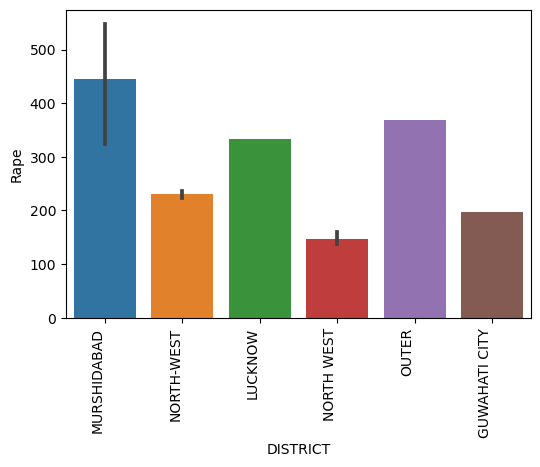

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x=df1['DISTRICT'], y=df1['Rape'])
plt.xticks(rotation=90,ha='right')
plt.show()

### Anlaysis of District vs Kidnapping

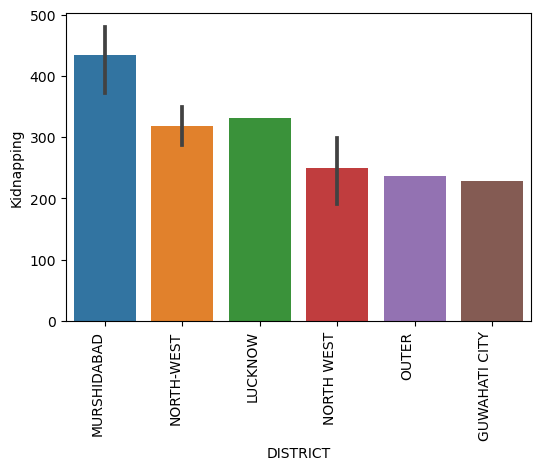

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x=df1['DISTRICT'], y=df1['Kidnapping'])
plt.xticks(rotation=90,ha='right')
plt.show()

Conclusion:

The dataframe indicates that North-West Delhi has the fewest rape crimes, whereas Murshidabad is the West Bengal district with the most cases of rape.


The highest number of kidnapping cases are found in the West Bengal district of Murshidabad, while the lowest number are found in the Assamese district of Guwahati City.